In [355]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import nbconvert

In [356]:
prenotazioni = pd.read_csv('prenotazioni.csv.gz')
prenotazioni.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,684809437988328502,https://www.airbnb.com/rooms/684809437988328502,20240310234931,2024-03-11,city scrape,Fashion large flat Central Venice,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/39f8b9e4-83e6...,19526057,...,4.50,4.75,4.75,NaN,f,31,22,9,0,0.21
1,1064559460070742972,https://www.airbnb.com/rooms/1064559460070742972,20240310234931,2024-03-11,city scrape,venice rooms arian - room 15,"Due to its strategic location, this space offe...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,555261009,...,NaN,NaN,NaN,NaN,t,24,1,23,0,NaN
2,42949852,https://www.airbnb.com/rooms/42949852,20240310234931,2024-03-11,city scrape,Admiral Home Central Venice N1,"In Riva di Biasio, just a few minutes away by ...",NaN,https://a0.muscache.com/pictures/ccbd712c-9953...,341878853,...,4.25,4.75,4.00,NaN,t,18,0,18,0,0.16
3,44570878,https://www.airbnb.com/rooms/44570878,20240310234931,2024-03-11,city scrape,Belvilla by OYO Appartamento N26,Unleash your fantasies and create a memorable ...,NaN,https://a0.muscache.com/pictures/b4ce00b2-7cc4...,270230010,...,NaN,NaN,NaN,NaN,t,27,27,0,0,NaN
4,826883287415861106,https://www.airbnb.com/rooms/826883287415861106,20240310234931,2024-03-11,city scrape,La Dogaressa Guest House,The accommodation is located 300 meters from t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,501093517,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.17


In [357]:
prenotazioni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8000 non-null   int64  
 1   listing_url                                   8000 non-null   object 
 2   scrape_id                                     8000 non-null   int64  
 3   last_scraped                                  8000 non-null   object 
 4   source                                        8000 non-null   object 
 5   name                                          8000 non-null   object 
 6   description                                   7781 non-null   object 
 7   neighborhood_overview                         4634 non-null   object 
 8   picture_url                                   8000 non-null   object 
 9   host_id                                       8000 non-null   i

In [358]:
prenotazioni_venezia = prenotazioni.loc[:, ["id", "name", "description", "host_name", "host_since", "host_is_superhost", "host_total_listings_count", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "latitude", "longitude", "room_type", "accommodates", "bathrooms", "bedrooms", "amenities", "price", "number_of_reviews", "review_scores_rating"]]  

In [359]:
prenotazioni_venezia.head()

,id,name,description,host_name,host_since,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,amenities,price,number_of_reviews,review_scores_rating
0,684809437988328502,Fashion large flat Central Venice,Keep it simple at this peaceful and centrally-...,Mirko,2014-08-05,f,53,Cannaregio,Isole,45.440580,12.335800,Entire home/apt,5,1.0,2.0,"[""Kitchen"", ""Air conditioning"", ""Wifi"", ""Fire ...",$169.00,4,4.5
1,1064559460070742972,venice rooms arian - room 15,"Due to its strategic location, this space offe...",Andi,2024-01-08,f,24,Piave 1860,Terraferma,45.488923,12.244380,Private room,2,2.0,1.0,"[""Lock on bedroom door"", ""Paid parking on prem...",$60.00,0,NaN
2,42949852,Admiral Home Central Venice N1,"In Riva di Biasio, just a few minutes away by ...",Stefano,2020-03-17,f,18,Santa Croce,Isole,45.442070,12.325640,Private room,3,1.0,1.0,"[""First aid kit"", ""Kitchen"", ""Hot water"", ""Air...",$85.00,4,4.0
3,44570878,Belvilla by OYO Appartamento N26,Unleash your fantasies and create a memorable ...,Iris - BELVILLA,2019-06-21,f,2353,Piave 1860,Terraferma,45.483150,12.241960,Entire home/apt,4,1.0,1.0,"[""Kitchen"", ""Hangers"", ""TV with standard cable...","$15,960.00",0,NaN
4,826883287415861106,La Dogaressa Guest House,The accommodation is located 300 meters from t...,Raffaella,2023-02-14,f,1,Santa Croce,Isole,45.440276,12.332061,Private room,2,0.0,7.0,"[""Smoke alarm"", ""Wifi"", ""Host greets you"", ""Ha...",$172.00,2,5.0


In [360]:
prenotazioni_venezia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            8000 non-null   int64  
 1   name                          8000 non-null   object 
 2   description                   7781 non-null   object 
 3   host_name                     8000 non-null   object 
 4   host_since                    8000 non-null   object 
 5   host_is_superhost             7962 non-null   object 
 6   host_total_listings_count     8000 non-null   int64  
 7   neighbourhood_cleansed        8000 non-null   object 
 8   neighbourhood_group_cleansed  8000 non-null   object 
 9   latitude                      8000 non-null   float64
 10  longitude                     8000 non-null   float64
 11  room_type                     8000 non-null   object 
 12  accommodates                  8000 non-null   int64  
 13  bat

In [361]:
prenotazioni_venezia['host_since'] = pd.to_datetime(prenotazioni_venezia['host_since'])
prenotazioni_venezia = prenotazioni_venezia.dropna(subset=['price', 'bedrooms', 'bathrooms'])
prenotazioni_venezia['description'] = prenotazioni_venezia['description'].fillna('')
prenotazioni_venezia['host_is_superhost'] = prenotazioni_venezia['host_is_superhost'].fillna('f')
prenotazioni_venezia['review_scores_rating'] = prenotazioni_venezia['review_scores_rating'].fillna(prenotazioni_venezia['review_scores_rating'].mean())
prenotazioni_venezia['price'] = prenotazioni_venezia['price'].str.replace('$', '').str.replace(',', '').astype(float)

#droppo le righe sulla terraferma
prenotazioni_venezia = prenotazioni_venezia[prenotazioni_venezia['neighbourhood_group_cleansed'] != 'Terraferma']

In [362]:
prenotazioni_venezia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5859 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            5859 non-null   int64         
 1   name                          5859 non-null   object        
 2   description                   5859 non-null   object        
 3   host_name                     5859 non-null   object        
 4   host_since                    5859 non-null   datetime64[ns]
 5   host_is_superhost             5859 non-null   object        
 6   host_total_listings_count     5859 non-null   int64         
 7   neighbourhood_cleansed        5859 non-null   object        
 8   neighbourhood_group_cleansed  5859 non-null   object        
 9   latitude                      5859 non-null   float64       
 10  longitude                     5859 non-null   float64       
 11  room_type                     5859 

In [363]:
prenotazioni_venezia.describe()

,id,host_since,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating
count,5.859000e+03,5859,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000
mean,2.753908e+17,2016-12-02 00:50:08.294930944,24.092337,45.435373,12.337023,3.869944,1.345110,1.624168,222.159925,91.400068,4.734140
min,2.711600e+04,2009-06-26 00:00:00,1.000000,45.270572,12.299860,1.000000,0.000000,0.000000,26.000000,0.000000,1.000000
25%,1.741672e+07,2014-03-10 00:00:00,2.000000,45.433619,12.327843,2.000000,1.000000,1.000000,115.000000,8.000000,4.670000
50%,3.856398e+07,2016-06-04 00:00:00,5.000000,45.436770,12.334035,4.000000,1.000000,1.000000,150.000000,43.000000,4.800000
75%,6.727191e+17,2019-03-14 00:00:00,16.000000,45.440565,12.342675,5.000000,2.000000,2.000000,210.000000,130.000000,4.920000
max,1.108660e+18,2024-03-03 00:00:00,2353.000000,45.497190,12.420456,16.000000,11.000000,11.000000,20000.000000,1135.000000,5.000000
std,4.070952e+17,NaN,76.808156,0.013789,0.013807,1.861127,0.646403,0.850604,644.884481,121.827889,0.310215


In [364]:
prenotazioni_venezia.loc[prenotazioni_venezia['bathrooms'] <=1, 'bathrooms'] = 1
prenotazioni_venezia.loc[prenotazioni_venezia['bedrooms'] <=1, 'bedrooms'] = 1
prenotazioni_venezia = prenotazioni_venezia[prenotazioni_venezia['number_of_reviews'] >= 1]


In [365]:
prenotazioni_venezia.describe()

,id,host_since,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating
count,5.347000e+03,5347,5347.000000,5347.000000,5347.000000,5347.000000,5347.000000,5347.000000,5347.000000,5347.000000,5347.000000
mean,2.266503e+17,2016-09-07 15:04:04.398728192,22.618852,45.435824,12.337092,3.874883,1.351973,1.650271,214.279596,100.152048,4.735420
min,2.711600e+04,2009-06-26 00:00:00,1.000000,45.271994,12.300651,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000
25%,1.585446e+07,2014-02-02 00:00:00,2.000000,45.433649,12.327855,2.000000,1.000000,1.000000,114.000000,14.000000,4.660000
50%,3.410825e+07,2016-04-11 00:00:00,4.000000,45.436790,12.334080,4.000000,1.000000,1.000000,149.000000,53.000000,4.820000
75%,5.891547e+17,2018-11-16 00:00:00,15.000000,45.440550,12.342635,5.000000,2.000000,2.000000,205.000000,141.000000,4.930000
max,1.105057e+18,2024-02-21 00:00:00,1414.000000,45.497190,12.420337,16.000000,11.000000,11.000000,20000.000000,1135.000000,5.000000
std,3.719097e+17,NaN,63.153805,0.011835,0.013810,1.819754,0.637271,0.835520,662.302315,124.043546,0.324552


<style>
/* Riduce la dimensione del font del notebook */
body {
    font-size: 14px;
}

/* Aumenta l'area visibile delle slide */
div.output_area {
    max-width: 100%;
    margin-bottom: 0 !important;
}

/* Riduce la dimensione del font delle tabelle */
div.dataframe table {
    font-size: 14px;
}

/* Riduce la dimensione del font del testo di output */
div.output_subarea {
    font-size: 14px;
}
</style>


<h3>Luca Fregona</h3>
<h1>INVESTIRE IN UN AIRBNB:</h1><h1><b>VENEZIA</b></h1>
<h4>Progetto Data Science</h4>



<h2><b>MOTIVAZIONI:</b></h2>
<p>Il mondo degli affitti brevi e nella fattispecie di AirBnB mi ha sempre incuriosito e con l'occasione ho voluto capire se c'è la possibilità di fare uno studio da proporre a dei possibili investitori</p>
<br>
<h2><b>OBBIETTIVI POSTI</b></h2>
<ol>
  <li>Comprendere in modo descrittivo i dati più rilevanti nel mondo degli AirBnB a Venezia </li>
  <li>individuare in modo oggettivo una zona più favorevole per un eventuale investimento e capire cosa influenza il prezzo in un AirBnb</li>
</ol>

<h2><b>DESCRIZIONE DEL DATAFRAME</b></h2>
<p>Il download del dataframe è disponibile su Inside AirBnB oppure al seguente link: <a href="https://data.insideairbnb.com/italy/veneto/venice/2024-03-10/data/listings.csv.gz">Download</a></p>

<h4>Per preparare il dataframe alla visualizzazione ho:</h4>
<ul>
    <li>Selezionato solamente le colonne rilevanti per l'analisi</li>
    <li>Escluso tutte le entry corrispondenti alla zona "Terraferma" di Venezia</li>
    <li>Droppato le righe con valori NaN nelle categorie più rilevanti (es. 'Price')</li>
    <li>Riempito le righe con valori NaN con informazioni opportune nelle altre colonne</li>
    <li>Dove necessario ho sistemato i Dtype attraverso dei casting</li>
</ul>

In [408]:
prenotazioni_venezia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5347 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            5347 non-null   int64         
 1   name                          5347 non-null   object        
 2   description                   5347 non-null   object        
 3   host_name                     5347 non-null   object        
 4   host_since                    5347 non-null   datetime64[ns]
 5   host_is_superhost             5347 non-null   object        
 6   host_total_listings_count     5347 non-null   int64         
 7   neighbourhood_cleansed        5347 non-null   object        
 8   neighbourhood_group_cleansed  5347 non-null   object        
 9   latitude                      5347 non-null   float64       
 10  longitude                     5347 non-null   float64       
 11  room_type                     5347 

<h2>Parte 1:</h2>
<h3>Comprendere in modo descrittivo i dati più rilevanti nel mondo degli AirBnB a Venezia</h3>

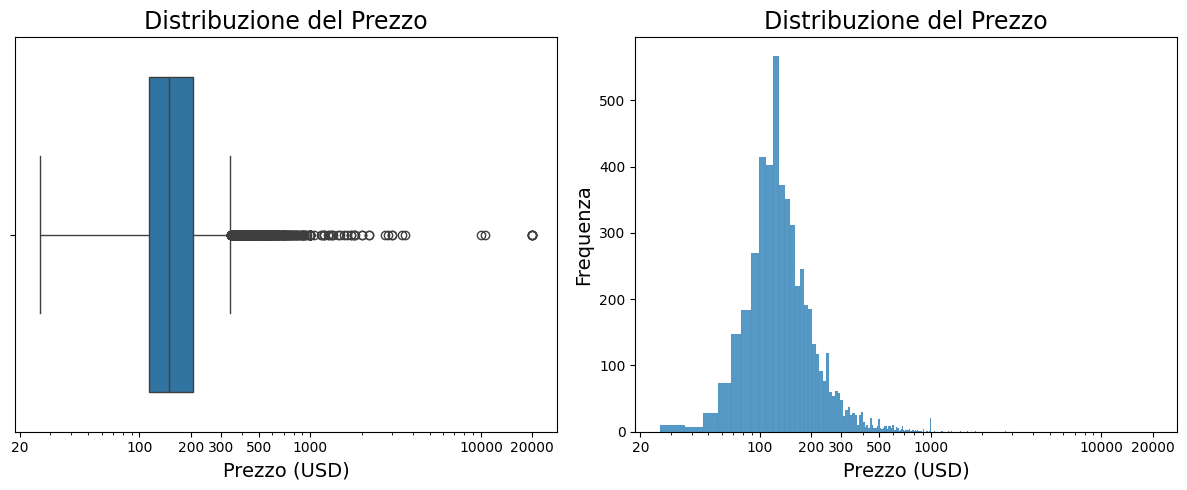

In [367]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=prenotazioni_venezia['price'], ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_title('Distribuzione del Prezzo', fontsize=17)
axes[0].set_xlabel('Prezzo (USD)', fontsize=14)
ticks = [20, 100, 200, 300, 500, 1000, 10000, 20000]
axes[0].set_xticks(ticks)
axes[0].set_xticklabels([str(tick) for tick in ticks])

sns.histplot(prenotazioni_venezia['price'], ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Distribuzione del Prezzo', fontsize=17)
axes[1].set_xlabel('Prezzo (USD)', fontsize=14)
axes[1].set_ylabel('Frequenza', fontsize=14)
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([str(tick) for tick in ticks])

plt.tight_layout()
plt.show()

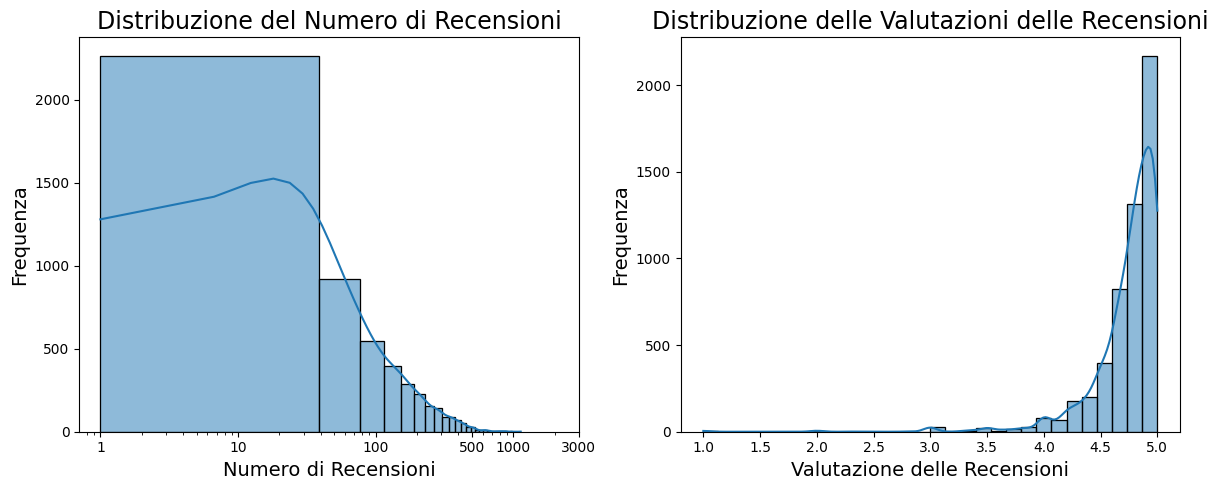

In [421]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(prenotazioni_venezia['number_of_reviews'], bins=30, kde=True, ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_title('Distribuzione del Numero di Recensioni', fontsize=17)
axes[0].set_xlabel('Numero di Recensioni', fontsize=14)
axes[0].set_ylabel('Frequenza', fontsize=14)
ticks_x = [1, 10, 100, 500, 1000, 3000]
axes[0].set_xticks(ticks_x)
axes[0].set_xticklabels([str(tick) for tick in ticks_x])


sns.histplot(prenotazioni_venezia['review_scores_rating'], bins=30, kde=True)
axes[1].set_title('Distribuzione delle Valutazioni delle Recensioni', fontsize=17)
axes[1].set_xlabel('Valutazione delle Recensioni', fontsize=14)
axes[1].set_ylabel('Frequenza', fontsize=14)

plt.tight_layout()
plt.show()

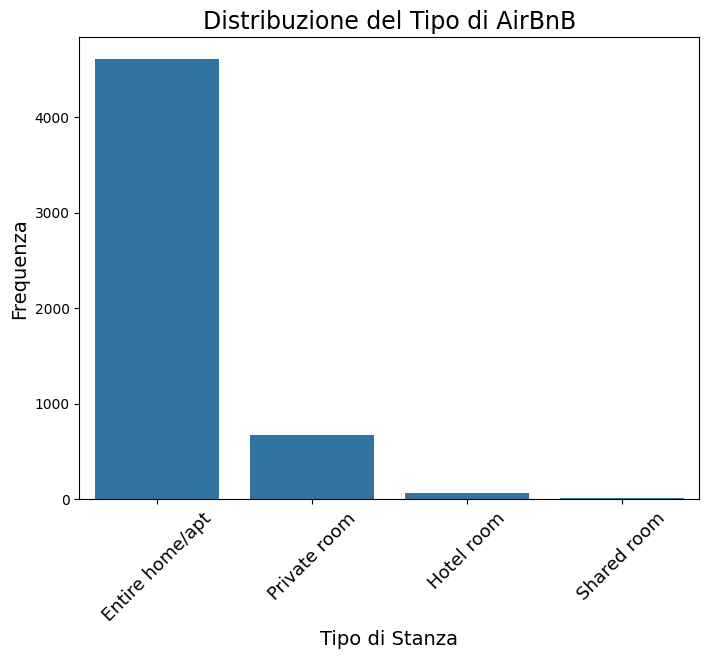

In [369]:
plt.figure(figsize=(8, 6))
sns.countplot(data=prenotazioni_venezia, x='room_type')
plt.xlabel('Tipo di Stanza', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.title('Distribuzione del Tipo di AirBnB', fontsize=17)
plt.xticks(rotation=45, fontsize=13)
plt.show()

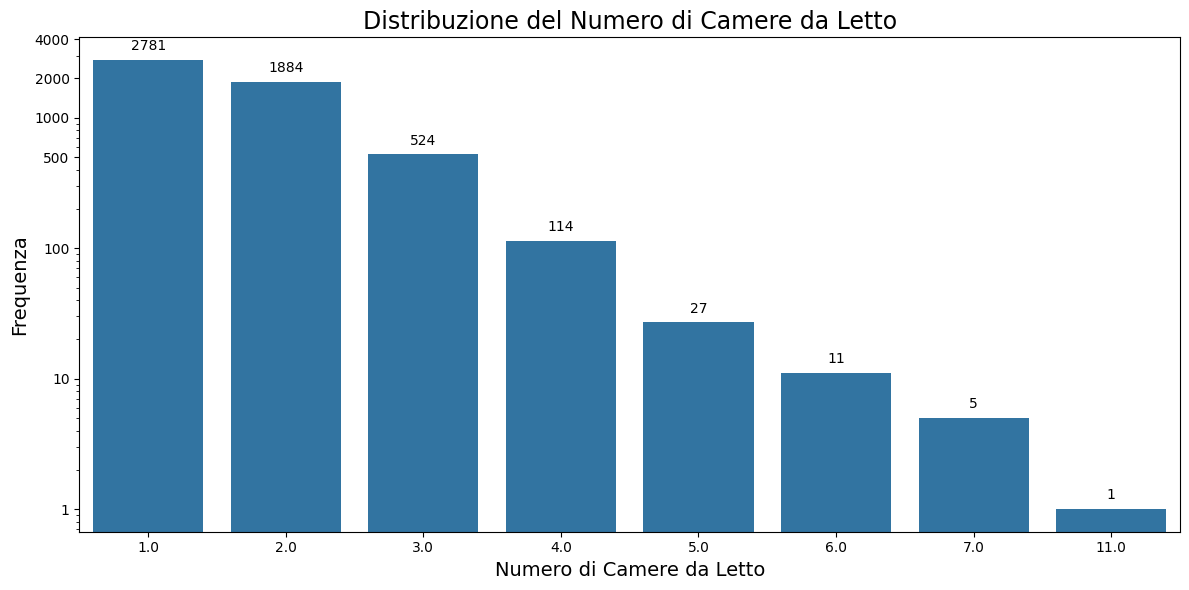

In [370]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=prenotazioni_venezia, x='bedrooms')

plt.title('Distribuzione del Numero di Camere da Letto', fontsize=17)
plt.xlabel('Numero di Camere da Letto', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.yscale('log')
ticks = [1, 10, 100, 500, 1000, 2000, 4000]
plt.yticks(ticks, [str(tick) for tick in ticks])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

In [371]:
stanza = prenotazioni_venezia.groupby('bedrooms').agg(
    price=('price', 'median'),
).reset_index()

                        
stanza = stanza.rename(columns={'price' : 'Prezzo'})

stanza

,bedrooms,Prezzo
0,1.0,124.0
1,2.0,170.0
2,3.0,245.0
3,4.0,400.0
4,5.0,649.0
5,6.0,661.0
6,7.0,172.0
7,11.0,3429.0


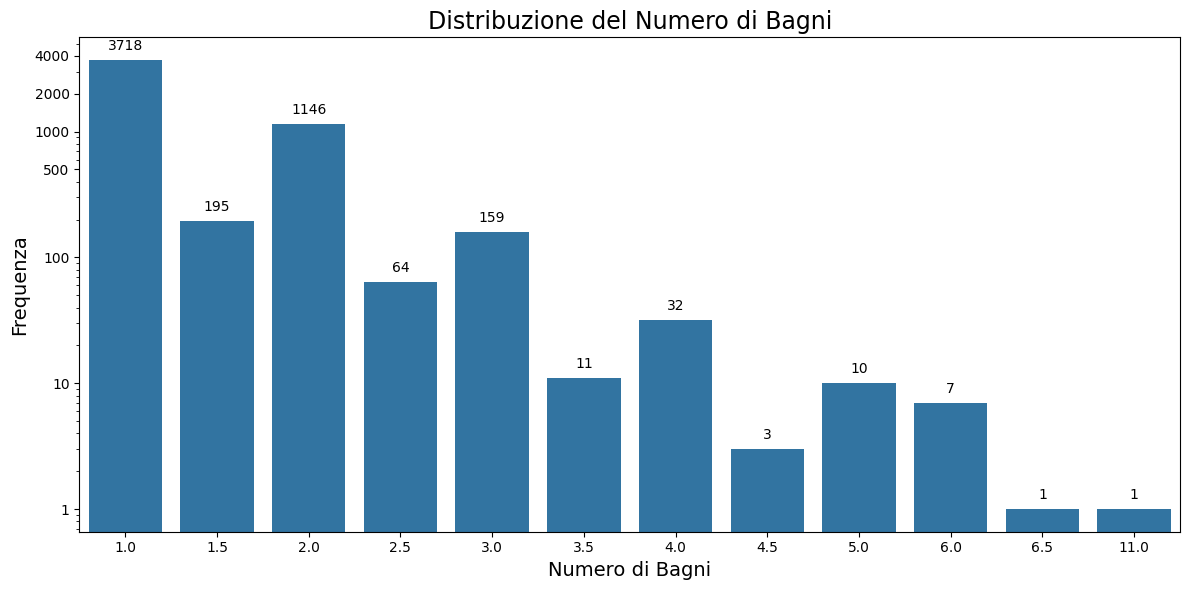

In [372]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=prenotazioni_venezia, x='bathrooms')

plt.title('Distribuzione del Numero di Bagni', fontsize=17)
plt.xlabel('Numero di Bagni', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.yscale('log')
ticks = [1, 10, 100, 500, 1000, 2000, 4000]
plt.yticks(ticks, [str(tick) for tick in ticks])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

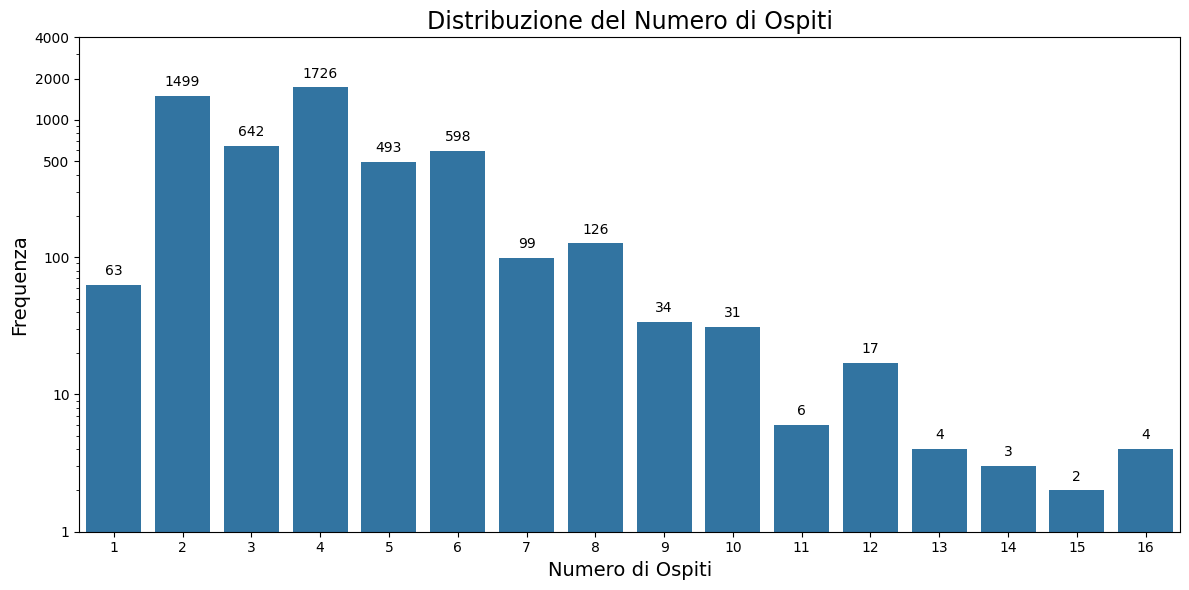

In [373]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=prenotazioni_venezia, x='accommodates')

plt.title('Distribuzione del Numero di Ospiti', fontsize=17)
plt.xlabel('Numero di Ospiti', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
ticks = [100, 500, 1000, 2000, 3000]
plt.yticks(ticks, [str(tick) for tick in ticks])
plt.yscale('log')
ticks = [1, 10, 100, 500, 1000, 2000, 4000]
plt.yticks(ticks, [str(tick) for tick in ticks])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


<h2>Parte 2:</h2>
<h3>E' possibile individuare in modo oggettivo una zona più favorevole per un eventuale investimento e capire cosa influenza il prezzo in un AirBnb?</h3>

In [413]:
prenotazioni_venezia_vicinato = (prenotazioni_venezia 
    .groupby('neighbourhood_cleansed')
    .agg({'price' : 'mean', 'neighbourhood_cleansed' : 'count'})
    .sort_values('price')
                                )
prenotazioni_venezia_vicinato = prenotazioni_venezia_vicinato.rename(columns={'price': 'Prezzo', 'neighbourhood_cleansed': 'Numero Alloggi'})
prenotazioni_venezia_vicinato = prenotazioni_venezia_vicinato.reset_index()
prenotazioni_venezia_vicinato = prenotazioni_venezia_vicinato.rename(columns={'neighbourhood_cleansed': 'Quartiere'})
prenotazioni_venezia_vicinato.tail()



,Quartiere,Prezzo,Numero Alloggi
15,San Polo,215.015656,511
16,Lido,222.912548,263
17,San Marco,243.089263,773
18,Torcello,250.000000,1
19,Castello,262.179706,1291


L'indice di Pearson tra prezzo e numero di alloggi corrisponde a: 0.586367


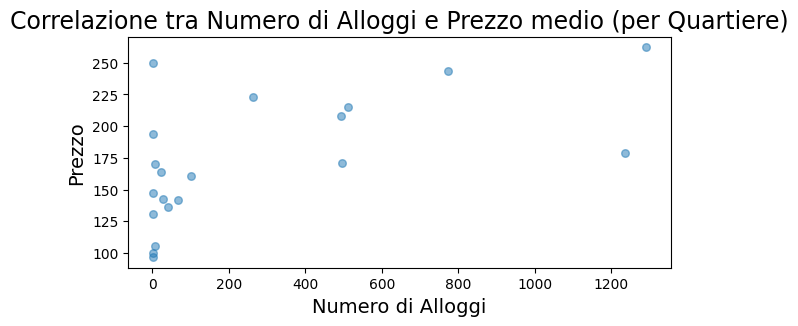

In [414]:
print("L'indice di Pearson tra prezzo e numero di alloggi corrisponde a: 0.586367")
plt.figure(figsize = (7, 3) )
a = prenotazioni_venezia_vicinato['Numero Alloggi']
b = prenotazioni_venezia_vicinato['Prezzo']
plt.scatter(a, b, s =30, alpha = .5 )
plt.title('Correlazione tra Numero di Alloggi e Prezzo medio (per Quartiere)', fontsize=17)
plt.xlabel('Numero di Alloggi', fontsize=14)
plt.ylabel('Prezzo', fontsize=14)
plt.show();

In [378]:
prenotazioni_venezia_vicinato_val = (prenotazioni_venezia 
    .groupby('neighbourhood_cleansed')
    .agg({'review_scores_rating' : 'mean', 'neighbourhood_cleansed' : 'count', 'price' : 'mean'})
    .sort_values('review_scores_rating')

                                )
prenotazioni_venezia_vicinato_val = prenotazioni_venezia_vicinato_val.rename(columns={'review_scores_rating': 'Valutazione delle Recensioni', 'neighbourhood_cleansed': 'Numero Alloggi', 'price' : 'Prezzo'})
prenotazioni_venezia_vicinato_val = prenotazioni_venezia_vicinato_val.reset_index()
prenotazioni_venezia_vicinato_val = prenotazioni_venezia_vicinato_val.rename(columns={'neighbourhood_cleansed': 'Quartiere'})
prenotazioni_venezia_vicinato_val.head()

,Quartiere,Valutazione delle Recensioni,Numero Alloggi,Prezzo
0,Tronchetto,4.000000,1,194.000000
1,Pellestrina,4.410000,3,96.666667
2,Alberoni,4.418148,27,142.888889
3,Sant'Erasmo,4.523750,8,105.750000
4,Cannaregio,4.715958,1237,179.051738


<p style='fontsize : "7"'>L'indice di Pearson tra Valutazione delle Recensioni e Prezzo corrisponde a: 0.086976</p>

In [424]:
data = {'x': prenotazioni_venezia_vicinato_val['Valutazione delle Recensioni'], 'y': prenotazioni_venezia_vicinato_val['Prezzo']}
df = pd.DataFrame(data)


pearson_corr = df.corr(method='pearson')
print(pearson_corr)

          x         y
x  1.000000  0.086976
y  0.086976  1.000000


In [381]:
# filtro il df per vicinato
dataf = prenotazioni_venezia[prenotazioni_venezia['neighbourhood_cleansed'] == "Torcello"]

# creo una mappa
mappa = folium.Map(location=[45.4408, 12.3155], zoom_start=10)

for idx, row in dataf.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['neighbourhood_cleansed']).add_to(mappa)

mappa

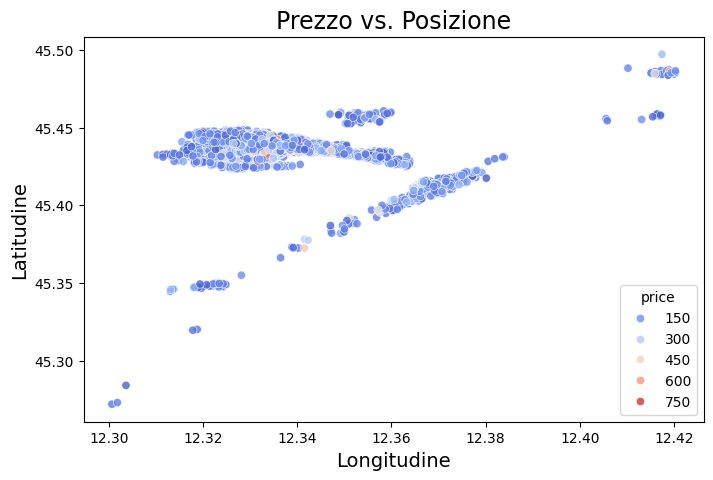

In [382]:
plt.figure(figsize=(8, 5))

prenotazioni_venezia_f = prenotazioni_venezia[prenotazioni_venezia['price']<800]

sns.scatterplot(data=prenotazioni_venezia_f, x='longitude', y='latitude', hue='price', palette='coolwarm', alpha=0.8)
plt.xlabel('Longitudine', fontsize=14)
plt.ylabel('Latitudine', fontsize=14)
plt.title('Prezzo vs. Posizione', fontsize=17)
plt.show()

In [383]:
from folium.plugins import MarkerCluster
import json

mappa = folium.Map(location=[45.4408, 12.3155], zoom_start=7) #circa su venezia

cluster_punti = MarkerCluster().add_to(mappa)

for idx, row in prenotazioni_venezia.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
    ).add_to(cluster_punti)

mappa

In [384]:
prenotazioni_venezia_ospiti = (
    prenotazioni_venezia

    .groupby('accommodates')
    .agg({'price' : 'mean'})
    .sort_values('price')
    .reset_index()
                              )

prenotazioni_venezia_ospiti = prenotazioni_venezia_ospiti.rename(columns={'accommodates': 'Numero Ospiti'})
prenotazioni_venezia_ospiti

,Numero Ospiti,price
0,1,88.444444
1,2,158.374249
2,3,197.933022
3,4,209.373696
4,5,248.697769
5,6,260.217391
6,7,295.262626
7,8,376.269841
8,13,390.750000
9,11,403.333333


In [385]:
print("L'indice di Pearson tra prezzo medio e numero di ospiti corrisponde a: 0.76562")

L'indice di Pearson tra prezzo medio e numero di ospiti corrisponde a: 0.76562


In [386]:
###Calcolo il coefficiente di Pearson del prezzo medio rispetto al numero di ospiti: 0.76562

data = {'x': prenotazioni_venezia_ospiti['price'], 'y': prenotazioni_venezia_ospiti['Numero Ospiti']}
df = pd.DataFrame(data)


pearson_corr = df.corr(method='pearson')
print(pearson_corr)

         x        y
x  1.00000  0.76562
y  0.76562  1.00000


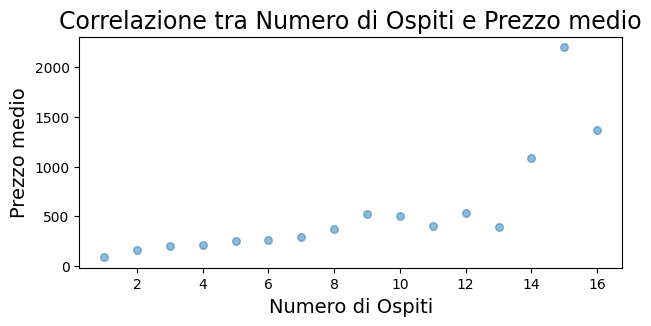

In [419]:
plt.figure(figsize = (7, 3) )
b = prenotazioni_venezia_ospiti['price']
a = prenotazioni_venezia_ospiti['Numero Ospiti']
plt.scatter(a, b, s =30, alpha = .5 )
plt.title('Correlazione tra Numero di Ospiti e Prezzo medio', fontsize=17)
plt.xlabel('Numero di Ospiti', fontsize=14)
plt.ylabel('Prezzo medio', fontsize=14)
plt.show();

In [388]:
prenotazioni_venezia_tempo = (prenotazioni_venezia
                              .set_index('host_since')
                              .resample("YE")
                              .agg({'neighbourhood_cleansed' : 'count', 'price' : 'mean'})
                             )
prenotazioni_venezia_tempo = prenotazioni_venezia_tempo.rename(columns={'neighbourhood_cleansed': 'Numero Appartamenti', 'price' : 'Prezzo'})
prenotazioni_venezia_tempo

,Numero Appartamenti,Prezzo
host_since,,
2009-12-31,1,126.000000
2010-12-31,90,155.111111
2011-12-31,218,272.587156
2012-12-31,457,206.048140
2013-12-31,504,201.515873
2014-12-31,635,330.703937
2015-12-31,618,198.639159
2016-12-31,513,202.173489
2017-12-31,449,188.757238


In [389]:
data = {'x': prenotazioni_venezia_tempo['Prezzo'], 'y': prenotazioni_venezia_tempo['Numero Appartamenti']}
df = pd.DataFrame(data)


pearson_corr = df.corr(method='pearson')
print(pearson_corr)

          x         y
x  1.000000  0.432631
y  0.432631  1.000000


In [390]:
neighborhood_counts = prenotazioni_venezia.groupby("neighbourhood_cleansed").size().reset_index(name='num_apartments')
neighborhood_prices = prenotazioni_venezia.groupby("neighbourhood_cleansed")['price'].median().reset_index(name='price')
neighborhood_analysis = pd.merge(neighborhood_counts, neighborhood_prices, on='neighbourhood_cleansed')
neighborhood_analysis = neighborhood_analysis.sort_values(by='num_apartments')
neighborhood_analysis.sort_values('price', ascending=False)

neighborhood_analysis = neighborhood_analysis.rename(columns={'neighbourhood_cleansed': 'Quartiere', 'num_apartments' : 'Numero Appartamenti', 'price' : 'Prezzo Mediano'})
neighborhood_analysis

,Quartiere,Numero Appartamenti,Prezzo Mediano
19,Tronchetto,1,194.0
18,Torcello,1,250.0
8,Mazzorbo,1,131.0
13,San Pietro in Volta,2,100.0
11,Sacca Fisola,3,135.0
10,Pellestrina,3,110.0
7,Malamocco,6,115.5
16,Sant'Erasmo,8,93.0
1,Burano,23,137.0
0,Alberoni,27,124.0


In [391]:
data = {'x': neighborhood_analysis['Numero Appartamenti'], 'y': neighborhood_analysis['Prezzo Mediano']}
df = pd.DataFrame(data)


pearson_corr = df.corr(method='pearson')
print(pearson_corr)

          x         y
x  1.000000  0.152086
y  0.152086  1.000000


In [392]:
prenotazioni_venezia_rew = (
    prenotazioni_venezia

    .groupby('review_scores_rating')
    .agg({'price' : 'mean'})
    .sort_values('price')
    .reset_index()
                              )
prenotazioni_venezia_rew = prenotazioni_venezia_rew.rename(columns={'review_scores_rating': 'Valutazione Recensioni', 'price' : 'Prezzo medio'})
prenotazioni_venezia_rew

,Valutazione Recensioni,Prezzo medio
0,3.64,64.000000
1,2.80,66.000000
2,3.25,78.000000
3,3.71,87.000000
4,3.43,87.000000
...,...,...
122,1.00,343.600000
123,4.67,359.104000
124,4.78,378.173469
125,4.83,423.148760


In [405]:
prenotazioni_venezia['quote_count'] = prenotazioni_venezia['amenities'].apply(lambda x: x.count('"'))
prenotazioni_venezia['quote_count'] = prenotazioni_venezia['quote_count'].floordiv(2)
prenotazioni_venezia[['amenities', 'quote_count']].sort_values(by='quote_count', ascending=False)


,amenities,quote_count
3723,"[""Clothing storage"", ""Beach access \u2013 Beac...",84
422,"[""Bathtub"", ""Children\u2019s books and toys"", ...",79
3321,"[""Pack \u2019n play/Travel crib - always at th...",77
5697,"[""Public or shared beach access"", ""Bathtub"", ""...",73
7857,"[""Public or shared beach access"", ""Bathtub"", ""...",72
...,...,...
7841,[],0
6041,[],0
5537,[],0
5760,[],0


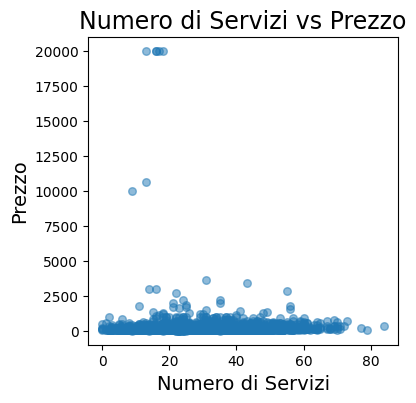

In [420]:
plt.figure(figsize = (4, 4) )
a = prenotazioni_venezia['quote_count']
b = prenotazioni_venezia['price']
plt.title('Numero di Servizi vs Prezzo', fontsize=17)
plt.xlabel('Numero di Servizi', fontsize=14)
plt.ylabel('Prezzo', fontsize=14)
plt.scatter(a, b, s =30, alpha = .5 )
plt.show();

In [395]:

data = {'x': prenotazioni_venezia['quote_count'], 'y': prenotazioni_venezia['price']}
df = pd.DataFrame(data)


pearson_corr = df.corr(method='pearson')
print(pearson_corr)

          x         y
x  1.000000 -0.014115
y -0.014115  1.000000


<h2>Conclusioni</h2>
<ul>
    <li>Non è stato possibile per me, con questi dati, individuare in modo oggettivo una zona più favorevole rispetto ad altre per una eventuale proposta di investimento</li>
    <li>Ho riscontrato diverse difficoltà nel trovare abbastanza correlazioni che possano dare risultati interessanti per comprendere cosa influenza il prezzo in un AirBnB</li>
</ul>
<br>

<p><i>L'analisi ha portato a qualche risultato ma non particolarmente interessante da presentarla a dei possibili investitori</i></p>
